In [1]:
import pandas as pd
from statsmodels.tsa.holtwinters import ExponentialSmoothing, SimpleExpSmoothing, Holt
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
x = pd.read_csv('/content/drive/MyDrive/TataSteel10years.csv')
x['Date'] = pd.to_datetime(x['Date'], format='%m/%d/%Y')
reversed_x = x.iloc[::-1]
x_sorted = reversed_x.reset_index(drop=True)

x_sorted['Date'] = pd.to_datetime(x_sorted['Date'])

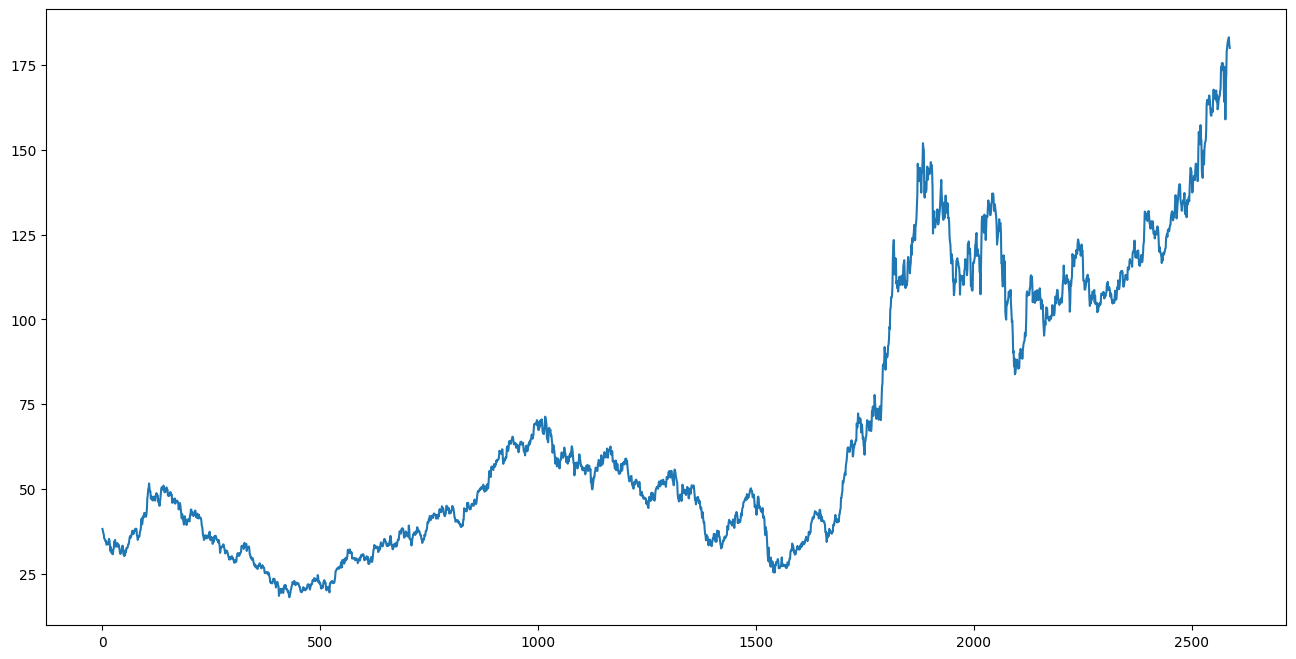

In [4]:
plt.figure(figsize=(16,8))
plt.plot(x_sorted["Price"], label="Day-wise price")

In [5]:
# Fit the Holt-Winters Seasonal model
model = ExponentialSmoothing(x_sorted['Price'], trend='add', seasonal=None)
fit = model.fit()

# Get the fitted values
x_sorted['Fitted'] = fit.fittedvalues

In [6]:
# Forecast the next 7 days
forecast = fit.forecast(steps=7)

# Create a DataFrame for the forecasted values
forecast_dates = pd.date_range(start=x_sorted['Date'].iloc[-1] + pd.Timedelta(days=1), periods=7)
forecast_df = pd.DataFrame({'Date': forecast_dates, 'Forecast': forecast})


In [7]:
# Calculate performance metrics
mae = mean_absolute_error(x_sorted['Price'], x_sorted['Fitted'])
rmse = np.sqrt(mean_squared_error(x_sorted['Price'], x_sorted['Fitted']))

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMSE): {rmse}')


Mean Absolute Error (MAE): 1.0727183648806977
Root Mean Squared Error (RMSE): 1.6948583849455674


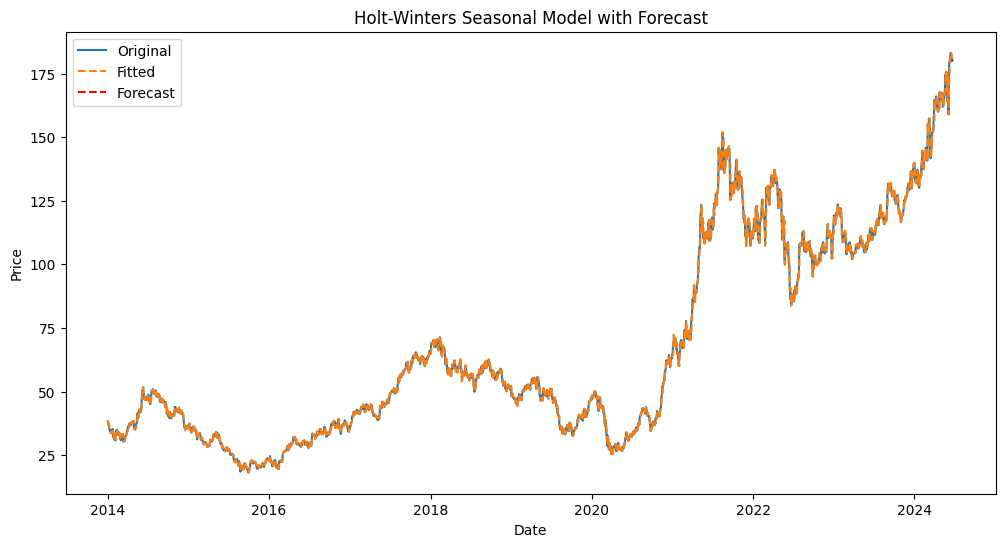

In [8]:
# Plot the original data, fitted values, and forecast
plt.figure(figsize=(12, 6))
plt.plot(x_sorted['Date'], x_sorted['Price'], label='Original')
plt.plot(x_sorted['Date'], x_sorted['Fitted'], label='Fitted', linestyle='--')
plt.plot(forecast_df['Date'], forecast_df['Forecast'], label='Forecast', linestyle='--', color='red')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Holt-Winters Seasonal Model with Forecast')
plt.legend()
plt.show()


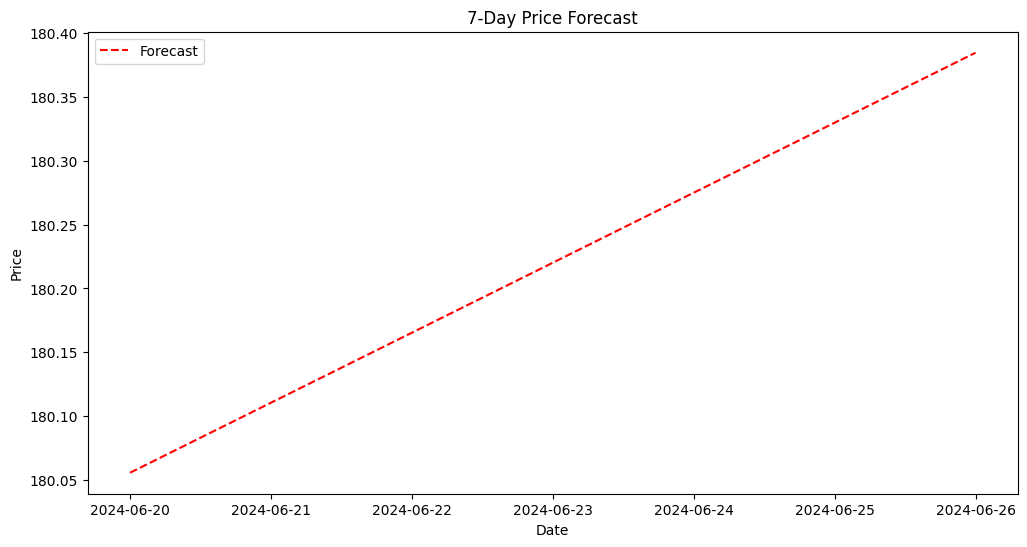

In [9]:
# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(forecast_df['Date'], forecast_df['Forecast'], label='Forecast', linestyle='--', color='red')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('7-Day Price Forecast')
plt.legend()
plt.show()


# Split and Test

In [10]:
train_size = int(len(x_sorted) * 0.7)
train, test = x_sorted[:train_size], x_sorted[train_size:]

In [11]:
model = SimpleExpSmoothing(train['Price'])#, trend=None, seasonal=None)
fit = model.fit()

In [12]:
test['Forecast'] = fit.forecast(steps=len(test))

<ipython-input-12-8a2c18a0bcfd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Forecast'] = fit.forecast(steps=len(test))


In [13]:
mae = mean_absolute_error(test['Price'], test['Forecast'])
rmse = np.sqrt(mean_squared_error(test['Price'], test['Forecast']))
mape = np.mean(np.abs((test['Price'] - test['Forecast']) / test['Price'])) * 100

actual_direction = np.sign(test['Price'].shift(-1) - test['Price'])
forecast_direction = np.sign(test['Forecast'].shift(-1) - test['Price'])

mda = np.mean(actual_direction == forecast_direction) * 100

print(f'Mean Directional Accuracy (MDA): {mda:.2f}%')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')

Mean Directional Accuracy (MDA): 50.45%
Mean Absolute Error (MAE): 17.885022569253035
Root Mean Squared Error (RMSE): 24.492108665894758
Mean Absolute Percentage Error (MAPE): 13.27%


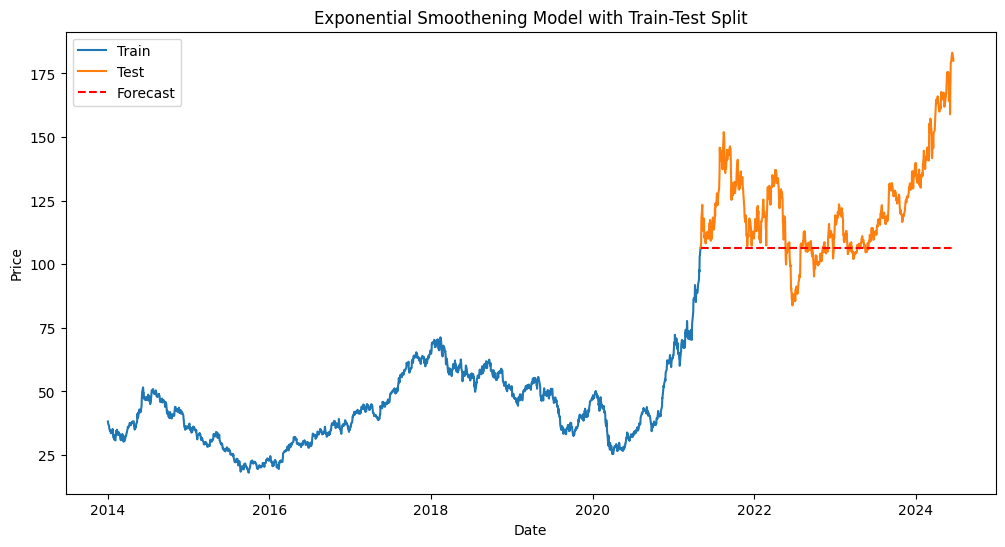

In [14]:
# Plot the original data, fitted values, and forecast
plt.figure(figsize=(12, 6))
plt.plot(train['Date'], train['Price'], label='Train')
plt.plot(test['Date'], test['Price'], label='Test')
plt.plot(test['Date'], test['Forecast'], label='Forecast', linestyle='--', color='red')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Exponential Smoothening Model with Train-Test Split')
plt.legend()
plt.show()

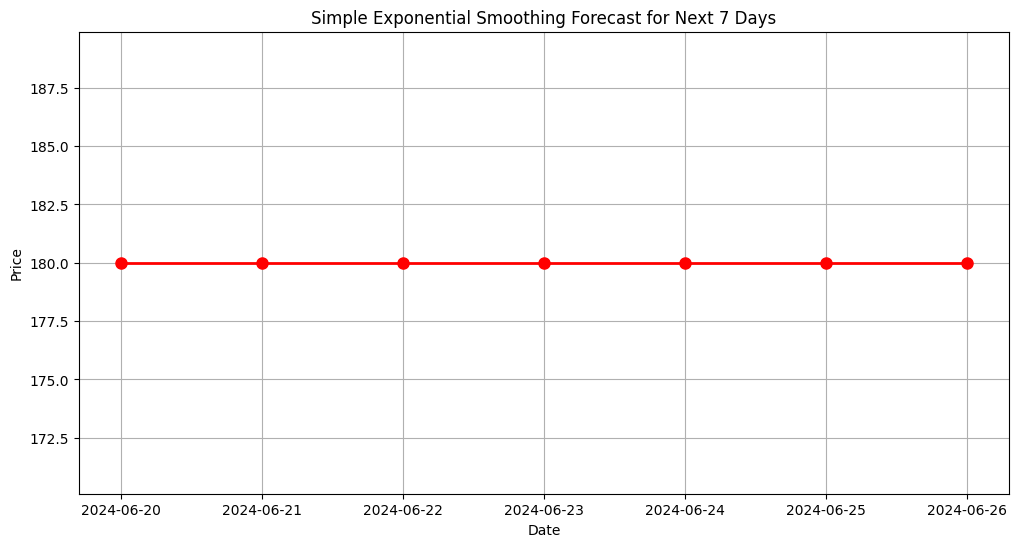

In [15]:
model = ExponentialSmoothing(x_sorted['Price'], trend=None)
fit = model.fit()

forecast_steps = 7
forecast_index = pd.date_range(start=x_sorted['Date'].max() + pd.Timedelta(days=1), periods=forecast_steps)
forecast = fit.forecast(steps=forecast_steps)

plt.figure(figsize=(12, 6))
plt.plot(forecast_index, forecast, color='red', marker='o', linestyle='-', linewidth=2, markersize=8)
plt.title('Simple Exponential Smoothing Forecast for Next 7 Days')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [24]:
# Calculate the first differences of the 'Price' column
x_sorted['Price_Diff'] = x_sorted['Price'].diff()

# Drop the first row since it will have a NaN value after differencing
x_sorted = x_sorted.dropna()
train_diff = x_sorted[:-777]
test_diff = x_sorted[-777:]

In [25]:
# Fit the Exponential Smoothing model to the differenced data
model_diff = ExponentialSmoothing(x_sorted['Price_Diff'], trend=None)
fit_diff = model_diff.fit()

# Forecast the next 7 days for the differenced data
forecast_diff = fit_diff.forecast(steps=7)

# Create a DataFrame for the forecasted differenced values
forecast_dates_diff = pd.date_range(start=x_sorted['Date'].iloc[-1] + pd.Timedelta(days=1), periods=7)
forecast_df_diff = pd.DataFrame({'Date': forecast_dates_diff, 'Forecast_Diff': forecast_diff})

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


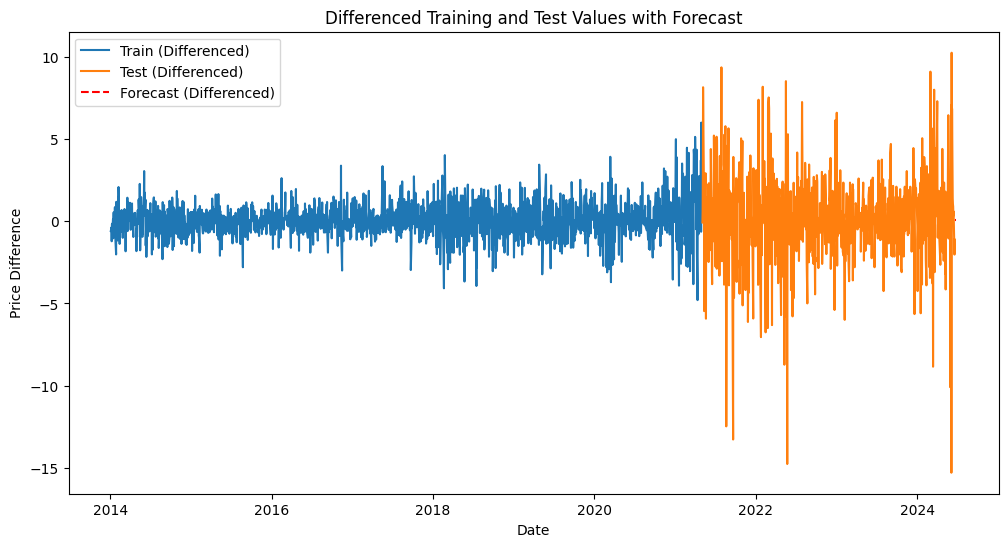

In [29]:
# Plot the differenced training and test values along with the forecast
plt.figure(figsize=(12, 6))
plt.plot(train_diff['Date'], train_diff['Price_Diff'], label='Train (Differenced)')
plt.plot(test_diff['Date'], test_diff['Price_Diff'], label='Test (Differenced)')
plt.plot(forecast_df_diff['Date'], forecast_df_diff['Forecast_Diff'], label='Forecast (Differenced)', linestyle='--', color='red')
plt.xlabel('Date')
plt.ylabel('Price Difference')
plt.title('Differenced Training and Test Values with Forecast')
plt.legend()
plt.show()

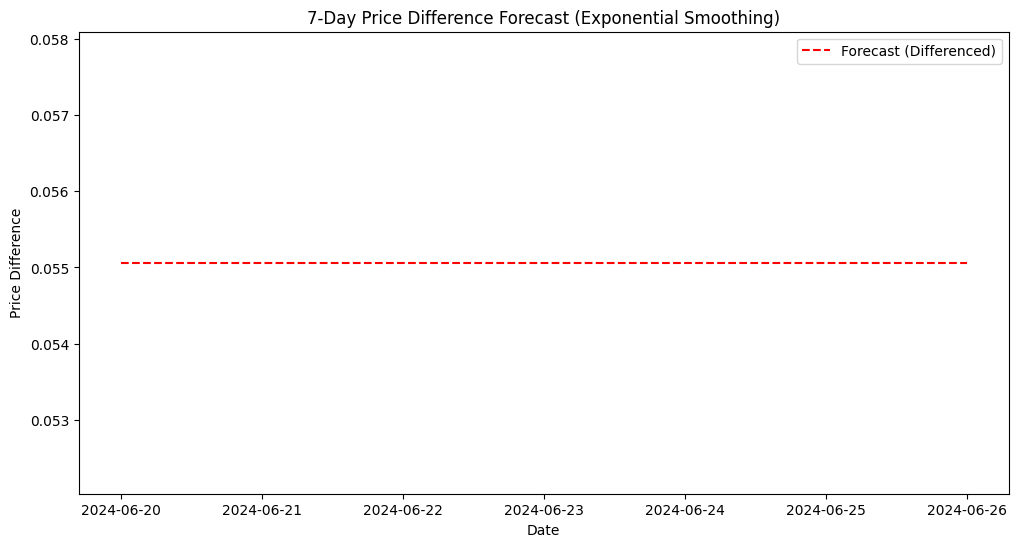

In [30]:
# Plot the forecast of differenced values
plt.figure(figsize=(12, 6))
plt.plot(forecast_df_diff['Date'], forecast_df_diff['Forecast_Diff'], label='Forecast (Differenced)', linestyle='--', color='red')
plt.xlabel('Date')
plt.ylabel('Price Difference')
plt.title('7-Day Price Difference Forecast (Exponential Smoothing)')
plt.legend()
plt.show()

In [32]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

y_true = test_diff['Price_Diff'].values[-7:]  # Use the last 7 values of test_diff
y_pred = forecast_df_diff['Forecast_Diff'].values

mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
directional_accuracy = np.mean(np.sign(y_true) == np.sign(y_pred)) * 100

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")
print(f"Directional Accuracy: {directional_accuracy:.2f}%")

MAE: 1.03
RMSE: 1.17
MAPE: 95.18%
Directional Accuracy: 71.43%
